# Computer infrastructure: Assessment

Assessment project for the course "Computer Infrastruture" of the Higher Diploma of Science in Computing for Data Analytics, ATU Galway-Mayo, 2025/2026. 

## Module import

In [1]:
# import libraries 
import yfinance as yf
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Problem 1: Data from yfinance

**About yfinance** 

Yfinance is a python library that pulls data from the Yahoo Finance API and makes it availale and ready-to-use within python code. The package is not officially linked to the Yahoo Finance organization, but the is updated with regular commits. 

The package can be installed from here: https://pypi.org/project/yfinance/. Documentation can be found here: https://ranaroussi.github.io/yfinance/index.html

### Get_data()

The function get_data() is created to pull hourly data from the past five days for the FAANG stocks (Facebook/Meta, Apple, Amazon, Netflix, Google). 


In [2]:
# create variable for the FAANG stocks: META, AAPL, AMZN, NFLX, GOOG. 
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

# show ticker object
tickers

yfinance.Tickers object <META,AAPL,AMZN,NFLX,GOOG>

In [3]:
# create function to get hourly data from the past 5 days for the FAANG stocks. 
def get_data(tickers): 
    # yfinance.download: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html#yfinance.download 
    df_with_intervals = tickers.download(period='5d', interval='60m')

    # Verify if a data folder exists, and if not, create one. 
    # See: https://stackoverflow.com/questions/273192/how-do-i-create-a-directory-and-any-missing-parent-directories 
    if not os.path.exists('data'):
        os.makedirs('data')
    
    # save dataframe to csv
    # set path to folder 
    folder_path = 'data/'
    # set file name with time and date. See: https://www.w3schools.com/python/python_datetime.asp
    file_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.csv'

    full_path = folder_path + file_name

    # save dataframe to csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.htm
    df_with_intervals.to_csv(full_path)

In [4]:
# execute the function 
get_data(tickers)

[*********************100%***********************]  5 of 5 completed


**About yfinance.download()**

The download method allows to dowload market information for a or multiple ticker objects (the variable *tickers*, in this case). Among the possible arguments, the method allows to select specific periods of time and interval. The output is a table, which is data represented in a tabular format. 

In this case, the variable **df_with_intervals** is a table where each row corresponds to one-hour intervals in the past 5 (working) days. Hourly intervals are pulled only during the opening hours of the stock market (13:30-19:30). Each column displays, for every stock, the following data: 

- Close
- Dividends 
- High
- Low
- Open
- Stock Splits
- Volume 

## Problem 2: Plotting the data



In this section, the most recent data saved is plotted. 

The package os is used to find the most recent file in the data folder, based on the timestamp in the name. 


In [5]:
# List all files in the data folder (see: https://www.geeksforgeeks.org/python/python-os-listdir-method/)
tickers_data = os.listdir('data')
# select the most recent file (see: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder)
latest_tickers_data = max(tickers_data)

The most recent data downloaded from Yahoo Finance and saved to a .csv file is opened as a Pandas dataframe. Pandas allows to read different types of strucutred data (including tabular data and json data), manipulate and plot it. 

In [6]:
# import the data from csv to pandas dataframe 
# the first 3 rows are read as headers: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
# datetime is used as index. 
df_latest_tickers = pd.read_csv('data/' + latest_tickers_data, header=[0,1,2])

df_latest_tickers.head()

Price              Close                     \
                      Ticker               AAPL               AMZN   
                    Datetime Unnamed: 1_level_2 Unnamed: 2_level_2   
0  2025-11-10 14:30:00+00:00         271.856995         248.029999   
1  2025-11-10 15:30:00+00:00         269.066406         246.380005   
2  2025-11-10 16:30:00+00:00         269.079987         247.104996   
3  2025-11-10 17:30:00+00:00         269.730011         248.630005   
4  2025-11-10 18:30:00+00:00         269.660004         248.769897   

                                                                    Dividends  \
                GOOG               META               NFLX               AAPL   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0         288.720001         633.837402        1124.795044               0.26   
1         286.965515         630.409973        1116.630005               0.00   
2         287.309998         633.864990        1116.839844               0.00   
3         288.839996         632.840027        1115.630005               0.00   
4         291.100006         632.780029        1115.599976               0.00   

                                                            ...  \
                AMZN               GOOG               META  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2  ...   
0                0.0                0.0                0.0  ...   
1                0.0                0.0                0.0  ...   
2                0.0                0.0                0.0  ...   
3                0.0                0.0                0.0  ...   
4                0.0                0.0                0.0  ...   

         Stock Splits                                          \
                 AAPL                AMZN                GOOG   
  Unnamed: 26_level_2 Unnamed: 27_level_2 Unnamed: 28_level_2   
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

                                                       Volume  \
                 META                NFLX                AAPL   
  Unnamed: 29_level_2 Unnamed: 30_level_2 Unnamed: 31_level_2   
0                 0.0                 0.0             7030981   
1                 0.0                 0.0             3083676   
2                 0.0                 0.0             2346213   
3                 0.0                 0.0             1807442   
4                 0.0                 0.0             3188667   

                                                               \
                 AMZN                GOOG                META   
  Unnamed: 32_level_2 Unnamed: 33_level_2 Unnamed: 34_level_2   
0             7213922             4164797             3873187   
1             3238084             1570763             1532229   
2             2393779              892605             1088389   
3             1959822              743976              879505   
4             1461943             1315791              781607   

                       
                 NFLX  
  Unnamed: 35_level_2  
0              720526  
1              257424  
2              175811  
3              162437  
4              171050  

[5 rows x 36 columns]

In [7]:
headers = list(df_latest_tickers)

headers


[('Price', 'Ticker', 'Datetime'),
 ('Close', 'AAPL', 'Unnamed: 1_level_2'),
 ('Close', 'AMZN', 'Unnamed: 2_level_2'),
 ('Close', 'GOOG', 'Unnamed: 3_level_2'),
 ('Close', 'META', 'Unnamed: 4_level_2'),
 ('Close', 'NFLX', 'Unnamed: 5_level_2'),
 ('Dividends', 'AAPL', 'Unnamed: 6_level_2'),
 ('Dividends', 'AMZN', 'Unnamed: 7_level_2'),
 ('Dividends', 'GOOG', 'Unnamed: 8_level_2'),
 ('Dividends', 'META', 'Unnamed: 9_level_2'),
 ('Dividends', 'NFLX', 'Unnamed: 10_level_2'),
 ('High', 'AAPL', 'Unnamed: 11_level_2'),
 ('High', 'AMZN', 'Unnamed: 12_level_2'),
 ('High', 'GOOG', 'Unnamed: 13_level_2'),
 ('High', 'META', 'Unnamed: 14_level_2'),
 ('High', 'NFLX', 'Unnamed: 15_level_2'),
 ('Low', 'AAPL', 'Unnamed: 16_level_2'),
 ('Low', 'AMZN', 'Unnamed: 17_level_2'),
 ('Low', 'GOOG', 'Unnamed: 18_level_2'),
 ('Low', 'META', 'Unnamed: 19_level_2'),
 ('Low', 'NFLX', 'Unnamed: 20_level_2'),
 ('Open', 'AAPL', 'Unnamed: 21_level_2'),
 ('Open', 'AMZN', 'Unnamed: 22_level_2'),
 ('Open', 'GOOG', 'Unnamed

In [8]:
# Create a new "Date" column to reformat datetime index to remove timezone & seconds
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html 
df_latest_tickers['Date'] = df_latest_tickers[('Price', 'Ticker', 'Datetime')].str.findall(r'\d{4}\-\d{2}\-\d{2} \d{2}:\d{2}').str[0]
# Create a Close_datetime to capture only EOD close price (at 19:30)
df_latest_tickers['Close_datetime'] = df_latest_tickers[('Price', 'Ticker', 'Datetime')].str.findall(r'\d{4}\-\d{2}\-\d{2} \d[9]:\d{2}').str[0].fillna(' ')

# show new columns
df_latest_tickers.head(5)

Price              Close                     \
                      Ticker               AAPL               AMZN   
                    Datetime Unnamed: 1_level_2 Unnamed: 2_level_2   
0  2025-11-10 14:30:00+00:00         271.856995         248.029999   
1  2025-11-10 15:30:00+00:00         269.066406         246.380005   
2  2025-11-10 16:30:00+00:00         269.079987         247.104996   
3  2025-11-10 17:30:00+00:00         269.730011         248.630005   
4  2025-11-10 18:30:00+00:00         269.660004         248.769897   

                                                                    Dividends  \
                GOOG               META               NFLX               AAPL   
  Unnamed: 3_level_2 Unnamed: 4_level_2 Unnamed: 5_level_2 Unnamed: 6_level_2   
0         288.720001         633.837402        1124.795044               0.26   
1         286.965515         630.409973        1116.630005               0.00   
2         287.309998         633.864990        1116.839844               0.00   
3         288.839996         632.840027        1115.630005               0.00   
4         291.100006         632.780029        1115.599976               0.00   

                                                            ...  \
                AMZN               GOOG               META  ...   
  Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2  ...   
0                0.0                0.0                0.0  ...   
1                0.0                0.0                0.0  ...   
2                0.0                0.0                0.0  ...   
3                0.0                0.0                0.0  ...   
4                0.0                0.0                0.0  ...   

         Stock Splits                                          \
                 GOOG                META                NFLX   
  Unnamed: 28_level_2 Unnamed: 29_level_2 Unnamed: 30_level_2   
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

               Volume                                          \
                 AAPL                AMZN                GOOG   
  Unnamed: 31_level_2 Unnamed: 32_level_2 Unnamed: 33_level_2   
0             7030981             7213922             4164797   
1             3083676             3238084             1570763   
2             2346213             2393779              892605   
3             1807442             1959822              743976   
4             3188667             1461943             1315791   

                                                       Date Close_datetime  
                 META                NFLX                                   
  Unnamed: 34_level_2 Unnamed: 35_level_2                                   
0             3873187              720526  2025-11-10 14:30                 
1             1532229              257424  2025-11-10 15:30                 
2             1088389              175811  2025-11-10 16:30                 
3              879505              162437  2025-11-10 17:30                 
4              781607              171050  2025-11-10 18:30                 

[5 rows x 38 columns]

In [9]:
# Create a subset for EOD data  (19:30) only 
eod_tickers = df_latest_tickers[df_latest_tickers['Close_datetime'] != ' ']
# remove time from "Date" to keep day only 
eod_tickers.loc[:,('Date')] = eod_tickers['Date'].replace(to_replace=' .+$', value='', regex=True)

# set datetime as index 
eod_tickers.set_index(('Price','Ticker','Datetime'), inplace=True)

eod_tickers.head(5)

Close                     \
                                        AAPL               AMZN   
                          Unnamed: 1_level_2 Unnamed: 2_level_2   
(Price, Ticker, Datetime)                                         
2025-11-10 19:30:00+00:00         269.118591         248.270004   
2025-11-11 19:30:00+00:00         275.250000         248.880005   
2025-11-12 19:30:00+00:00         274.049988         245.160004   
2025-11-13 19:30:00+00:00         273.039612         238.399002   
2025-11-14 19:30:00+00:00         272.989990         235.199997   

                                                                 \
                                        GOOG               META   
                          Unnamed: 3_level_2 Unnamed: 4_level_2   
(Price, Ticker, Datetime)                                         
2025-11-10 19:30:00+00:00         290.559998         632.632019   
2025-11-11 19:30:00+00:00         291.209991         626.650024   
2025-11-12 19:30:00+00:00         287.200012         611.289978   
2025-11-13 19:30:00+00:00         280.415009         605.940002   
2025-11-14 19:30:00+00:00         277.179993         610.000000   

                                                      Dividends  \
                                        NFLX               AAPL   
                          Unnamed: 5_level_2 Unnamed: 6_level_2   
(Price, Ticker, Datetime)                                         
2025-11-10 19:30:00+00:00        1120.659912                0.0   
2025-11-11 19:30:00+00:00        1136.540039                0.0   
2025-11-12 19:30:00+00:00        1161.180054                0.0   
2025-11-13 19:30:00+00:00        1154.459961                0.0   
2025-11-14 19:30:00+00:00        1119.439941                0.0   

                                                                 \
                                        AMZN               GOOG   
                          Unnamed: 7_level_2 Unnamed: 8_level_2   
(Price, Ticker, Datetime)                                         
2025-11-10 19:30:00+00:00                0.0                0.0   
2025-11-11 19:30:00+00:00                0.0                0.0   
2025-11-12 19:30:00+00:00                0.0                0.0   
2025-11-13 19:30:00+00:00                0.0                0.0   
2025-11-14 19:30:00+00:00                0.0                0.0   

                                                                  ...  \
                                        META                NFLX  ...   
                          Unnamed: 9_level_2 Unnamed: 10_level_2  ...   
(Price, Ticker, Datetime)                                         ...   
2025-11-10 19:30:00+00:00                0.0                 0.0  ...   
2025-11-11 19:30:00+00:00                0.0                 0.0  ...   
2025-11-12 19:30:00+00:00                0.0                 0.0  ...   
2025-11-13 19:30:00+00:00                0.0                 0.0  ...   
2025-11-14 19:30:00+00:00                0.0                 0.0  ...   

                                 Stock Splits                      \
                                         GOOG                META   
                          Unnamed: 28_level_2 Unnamed: 29_level_2   
(Price, Ticker, Datetime)                                           
2025-11-10 19:30:00+00:00                 0.0                 0.0   
2025-11-11 19:30:00+00:00                 0.0                 0.0   
2025-11-12 19:30:00+00:00                 0.0                 0.0   
2025-11-13 19:30:00+00:00                 0.0                 0.0   
2025-11-14 19:30:00+00:00                 0.0                 0.0   

                                                           Volume  \
                                         NFLX                AAPL   
                          Unnamed: 30_level_2 Unnamed: 31_level_2   
(Price, Ticker, Datetime)                                           
2025-11-10 19:30:00+00:00                 0.0             2248210  

Text(0.5, 1.0, 'FAANG Stocks - Close price over last 5 days')

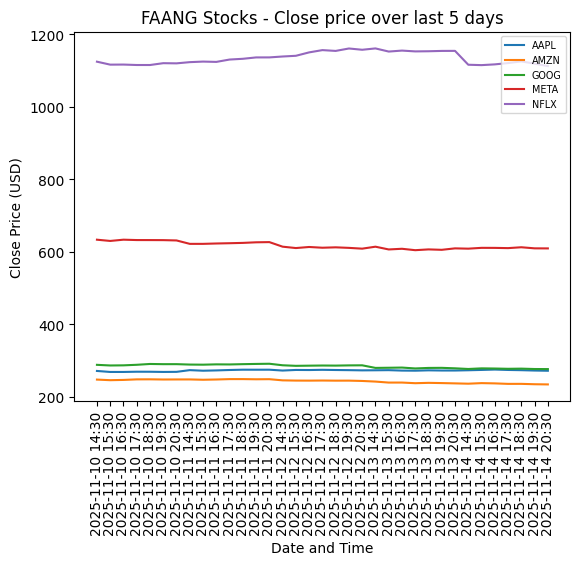

In [10]:
# Plot hourly close price 

# get subset for closing prices 
close_price = df_latest_tickers['Close']
# get index (date and time)
date = df_latest_tickers['Date']

fig, ax = plt.subplots()
ax.plot(date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(date, labels = date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')


Text(0.5, 1.0, 'FAANG Stocks - Close price over last 5 days')

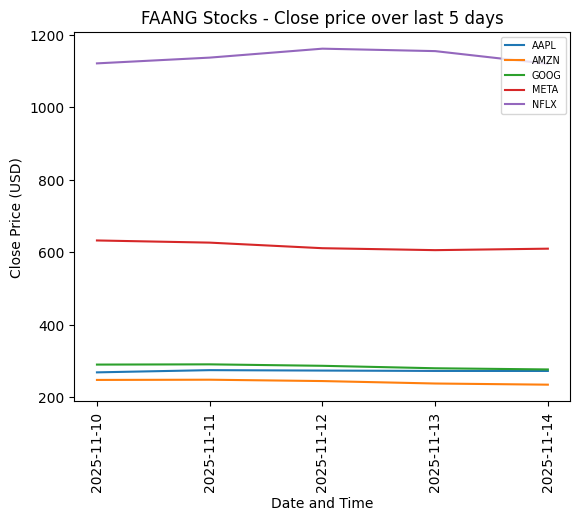

In [11]:
# [REMOVE]
# Plot EOD close price 

# get subset for closing prices 
close_price = eod_tickers['Close']
# get index (date and time)
eod_date = eod_tickers['Date']

fig, ax = plt.subplots()
ax.plot(eod_date, close_price)
ax.set_xlabel('Date and Time')
ax.set_ylabel('Close Price (USD)')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(labels = ["AAPL", "AMZN", "GOOG", "META", "NFLX"], fontsize = 'x-small')
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html 
ax.set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 

ax.set_title('FAANG Stocks - Close price over last 5 days')

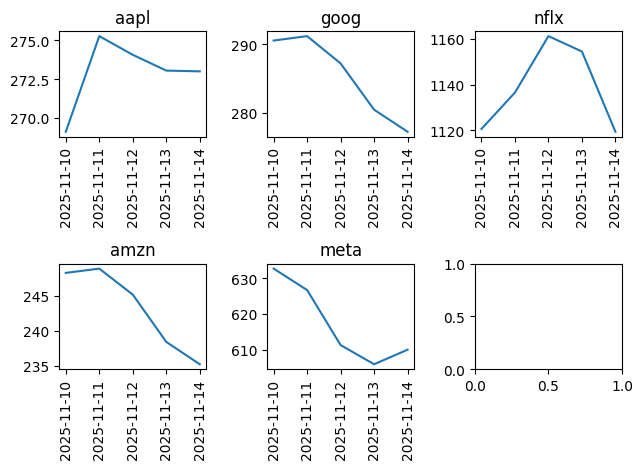

In [12]:
# Plot EOD close price in separate plots 
# Display the data in separate plots https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html 

# create arrays for variables 
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(eod_date, aapl)
axs[0, 0].set_title("aapl")
axs[0, 0].set_xticks(eod_date, labels = eod_date, rotation = 'vertical') 
axs[1, 0].plot(eod_date, amzn)
axs[1, 0].set_title("amzn")
axs[1, 0].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(eod_date, goog)
axs[0, 1].set_title("goog")
axs[0, 1].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[1, 1].plot(eod_date, meta)
axs[1, 1].set_title("meta")
axs[1, 1].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')
axs[0, 2].plot(eod_date, nflx)
axs[0, 2].set_title("nflx")
axs[0, 2].set_xticks(eod_date, labels = eod_date, rotation = 'vertical')

fig.tight_layout()


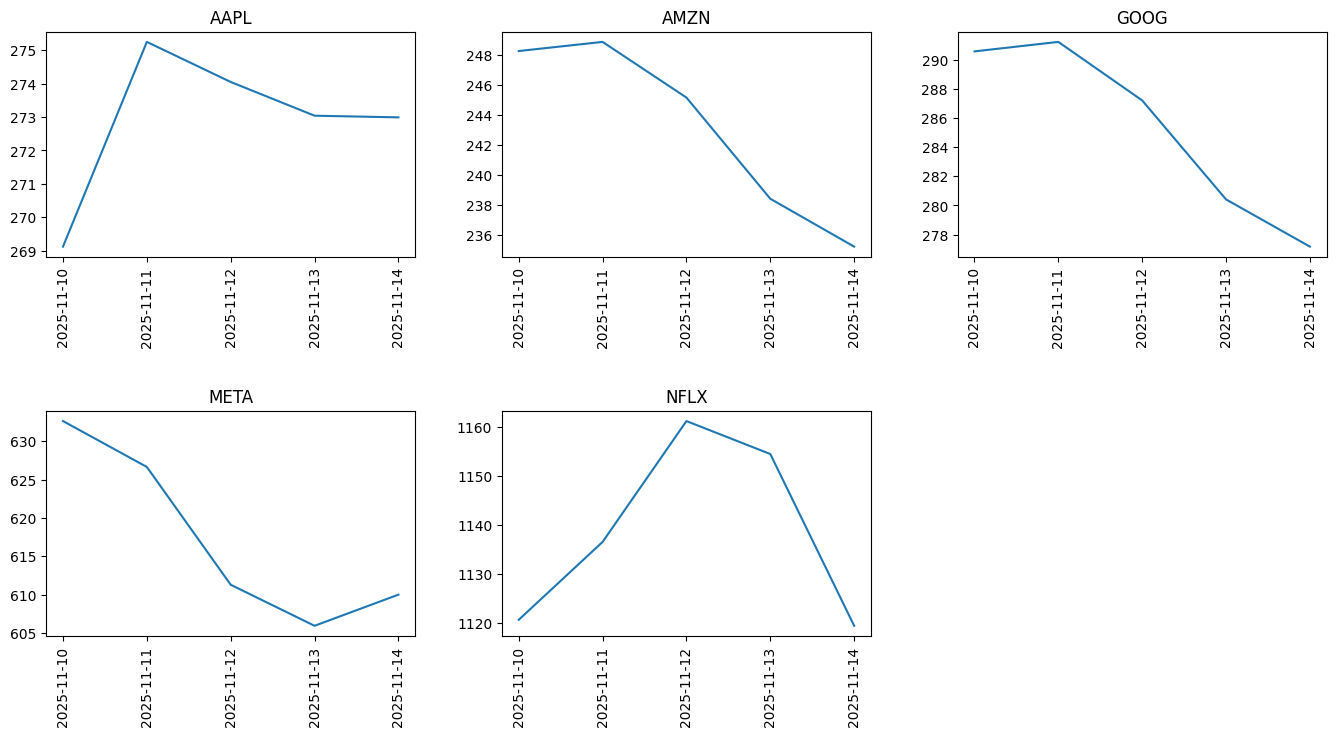

In [13]:
# See: https://chatgpt.com/share/6910e526-a2d0-800f-be66-94ac6a06bf9c 
# To add: percentage variation in value at EOD close price

# Create arrays for variables
aapl = eod_tickers[('Close','AAPL')]
amzn = eod_tickers[('Close','AMZN')]
goog = eod_tickers[('Close','GOOG')]
meta = eod_tickers[('Close','META')]
nflx = eod_tickers[('Close','NFLX')]

# Put data and titles in lists for easy looping
data = [aapl, amzn, goog, meta, nflx]
titles = ["AAPL", "AMZN", "GOOG", "META", "NFLX"]

# Create subplots: 2 rows, 3 columns, but we'll hide the last (empty) one
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Flatten the 2D array of axes for easy iteration
axs = axs.flatten()

# Plot each stock
for i, (ax, series, title) in enumerate(zip(axs, data, titles)):
    ax.plot(eod_date, series,)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=90)

# Hide the last unused subplot (the 6th one)
axs[-1].set_visible(False)

# Adjust spacing between plots
fig.tight_layout(pad=3.0)

plt.show()